In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Generate synthetic dataset
def generate_synthetic_data(num_samples=1000):
    crops = ['Rice', 'Wheat', 'Corn']
    months = np.arange(1, 13)  # Months from January (1) to December (12)
    
    data = []
    
    for _ in range(num_samples):
        crop = np.random.choice(crops)
        month = np.random.choice(months)
        
        # Define base price with a clearer pattern per crop and month
        if crop == 'Rice':
            base_price = 50 + (month - 6) * 2  # Rice prices peak mid-year
        elif crop == 'Wheat':
            base_price = 40 + (month - 7) * 3  # Wheat prices peak in late summer
        else:  # Corn
            base_price = 60 - (month - 8) * 4  # Corn prices peak in fall
        
        seasonal_effect = (month - 6)**2 / 5  
        price = base_price + seasonal_effect + np.random.normal(0, 2) 
        
        data.append([crop, month, price])
    
    return pd.DataFrame(data, columns=['Crop', 'Month', 'Price'])

# Create the synthetic dataset
df = generate_synthetic_data()

# Filter for only Rice
rice_df = df[df['Crop'] == 'Rice']

# Prepare data for modeling
X = rice_df[['Crop', 'Month']]
y = rice_df['Price']

# One-hot encode the Crop column
encoder = OneHotEncoder(sparse_output=False) 
X_encoded = encoder.fit_transform(X[['Crop']])
X_final = np.hstack((X_encoded, X[['Month']].values))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual and predicted prices
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

# Display the comparison table
print(comparison_df)

# Get the model's intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Get feature names for the one-hot encoded crop and month
crop_feature_names = encoder.get_feature_names_out(input_features=['Crop'])
feature_names = np.concatenate((crop_feature_names, ['Month']))

# Print the regression equation
equation = f"Price = {intercept:.2f} "
for name, coef in zip(feature_names, coefficients):
    equation += f"+ {coef:.2f} * {name} "

print("Regression Equation:")
print(equation)


     Actual Price  Predicted Price
542     61.884212        60.966676
405     45.117513        42.933470
611     51.754897        51.950073
28      67.622607        65.474978
314     48.072122        40.679319
..            ...              ...
701     51.172659        42.933470
164     47.381135        47.441771
739     51.663231        51.950073
791     44.445167        47.441771
348     69.246161        65.474978

[65 rows x 2 columns]
Regression Equation:
Price = 38.43 + 0.00 * Crop_Rice + 2.25 * Month 


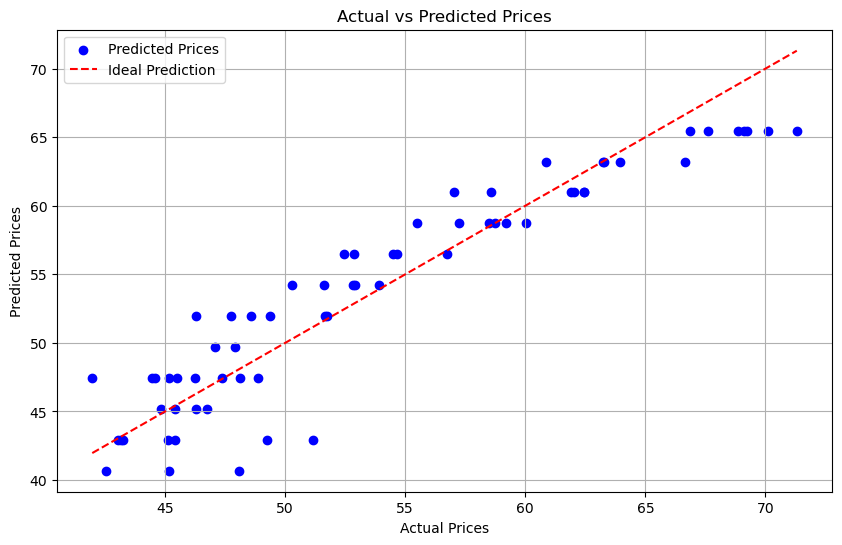

In [27]:
# Visualization of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()